## The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
## Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
## The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

In [1]:
# MRP , PER DAY PROFIT , PER MONTH PROFIT, PER YEAR PROFIT, WEIGHT, FOOD,NON-FOOD , STORE LOCATION , STORE SIZE

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [3]:
df_train= pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_train['source'] = 'train'
df_test['source'] = 'test'
df_test['Item_Outlet_Sales'] = 0
df = pd.concat([df_train, df_test], sort = False)
print(df_train.shape, df_test.shape, df.shape)

(8523, 13) (5681, 13) (14204, 13)


In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

<AxesSubplot: >

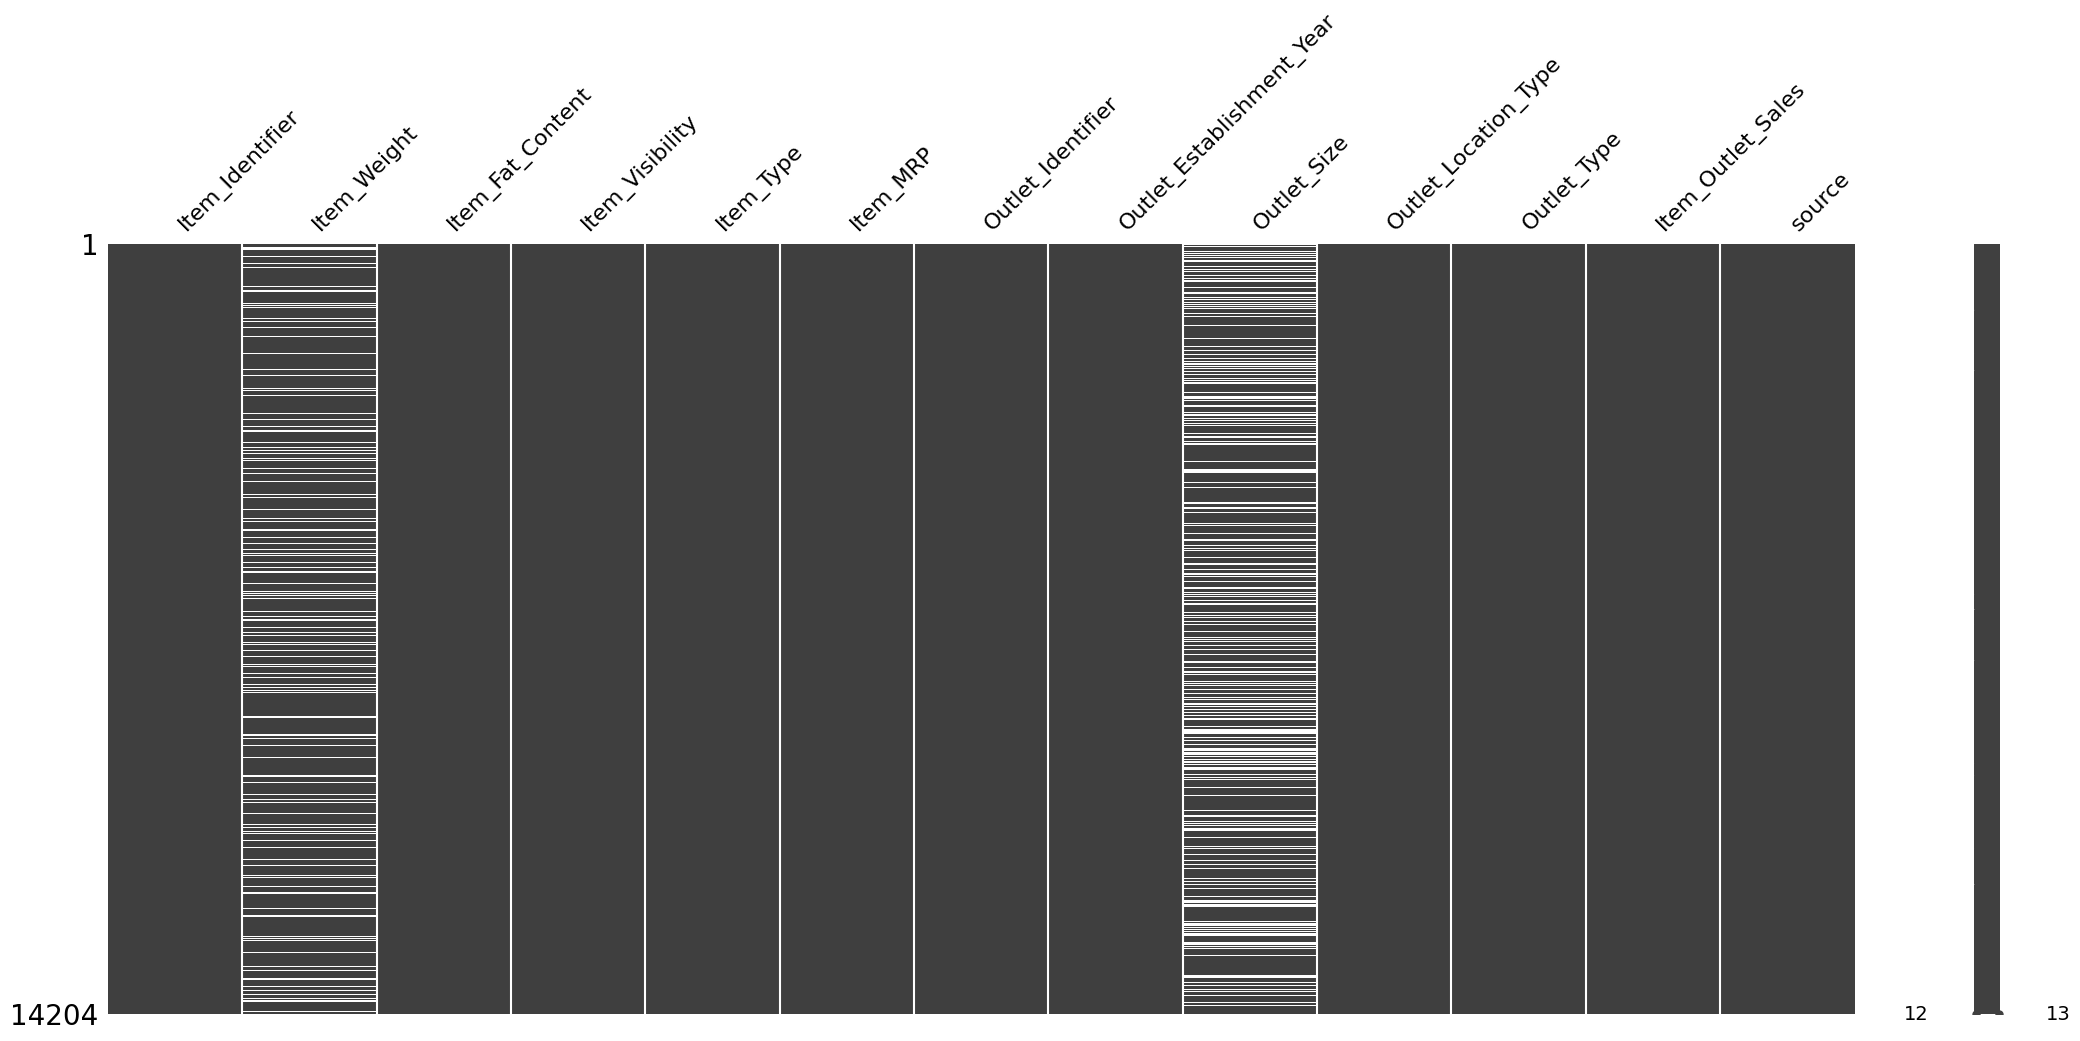

In [8]:
import missingno as msno

msno.matrix(df)

<Figure size 600x600 with 0 Axes>

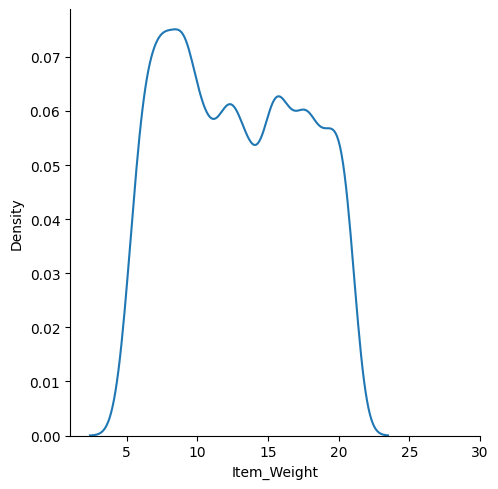

In [9]:
plt.figure(figsize = (6,6))
p = sns.displot(df['Item_Weight'],kind='kde')
p.set(xlim=(1,30))

In [10]:
from sklearn.impute import SimpleImputer
from scipy.stats import pearsonr

In [11]:
# Dealing with Item_Weight Column

In [12]:
df['Item_Weight'].mean()

12.792854228644284

In [13]:
# df_mean = df.copy()
mean_imputer = SimpleImputer(strategy='mean')
df['Item_Weight'] = mean_imputer.fit_transform(df['Item_Weight'].values.reshape(-1,1))

In [14]:
df['Item_Weight'].isnull().sum()


0

In [15]:
#Dealing with Outlet_Size Column

In [16]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [17]:
df['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [18]:
mode_of_outlet_size = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [19]:
missing_bool = df['Outlet_Size'].isnull()
df.loc[missing_bool, 'Outlet_Size'] = df.loc[missing_bool, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [20]:
df['Outlet_Size'].isnull().sum()


0

In [21]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage

In [23]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [24]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [25]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [26]:
sum(df['Item_Visibility']==0) # 526 products are not displayed in particular store .
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)

In [27]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [28]:
df[['Item_Identifier','Item_Type']]

,Item_Identifier,Item_Type
0,FDA15,Dairy
1,DRC01,Soft Drinks
2,FDN15,Meat
3,FDX07,Fruits and Vegetables
4,NCD19,Household
...,...,...
5676,FDB58,Snack Foods
5677,FDD47,Starchy Foods
5678,NCO17,Health and Hygiene
5679,FDJ26,Canned


In [29]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [30]:
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: New_Item_Type, dtype: int64

In [31]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,New_Item_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,Food
4,NCD19,8.93,Low Fat,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable


In [32]:
df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [33]:
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']

In [34]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
New_Item_Type                0
Outlet_Years                 0
dtype: int64

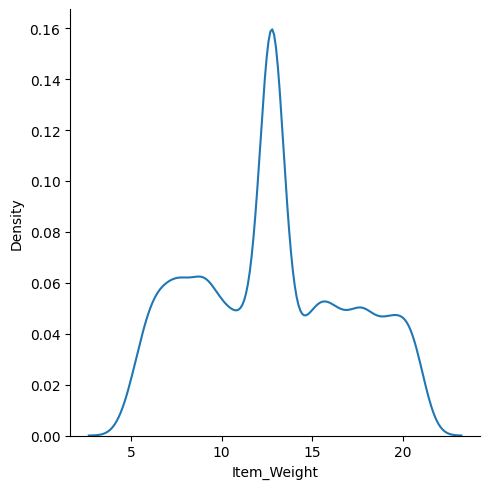

In [35]:
sns.displot(df['Item_Weight'],kind = 'kde')


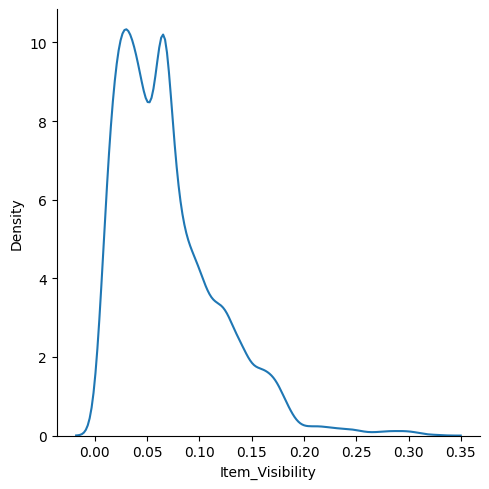

In [36]:
sns.displot(df['Item_Visibility'],kind='kde')


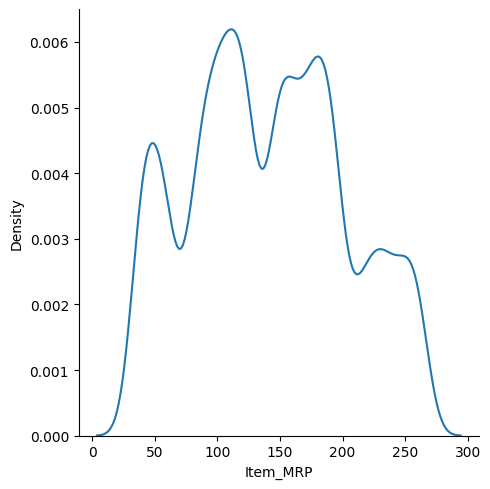

In [37]:
sns.displot(df['Item_MRP'],kind='kde')


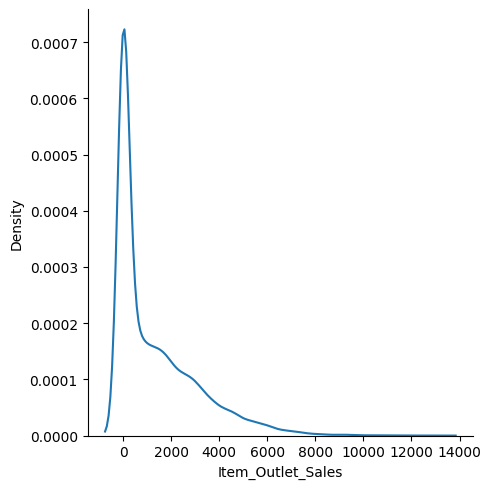

In [38]:
sns.displot(df['Item_Outlet_Sales'],kind='kde')


In [39]:
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])


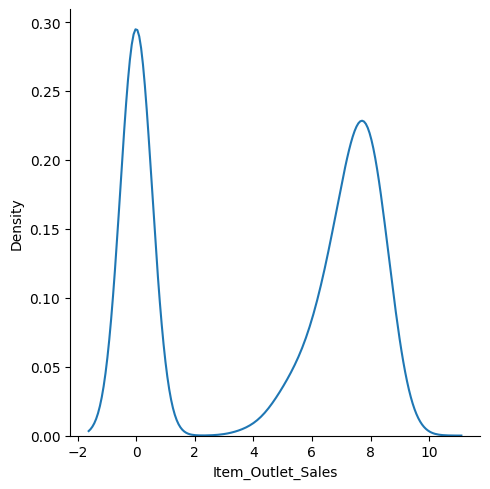

In [40]:
sns.displot(df['Item_Outlet_Sales'],kind='kde')


<AxesSubplot: xlabel='Item_Fat_Content', ylabel='count'>

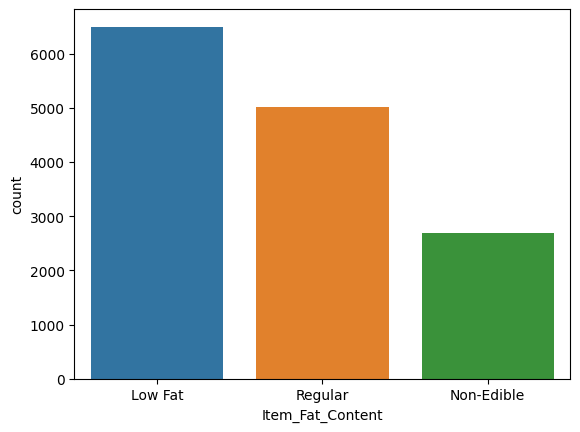

In [41]:
sns.countplot(x=df["Item_Fat_Content"])

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

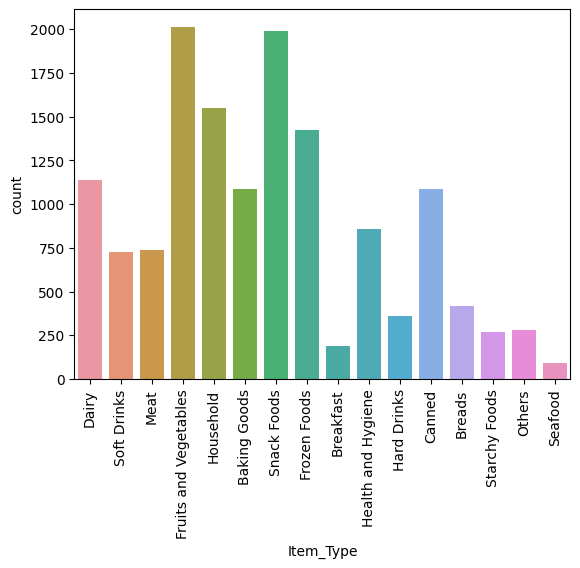

In [42]:
# plt.figure(figsize=(15,5))
l = list(df['Item_Type'].unique())
chart = sns.countplot(x=df["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)

<AxesSubplot: xlabel='Outlet_Establishment_Year', ylabel='count'>

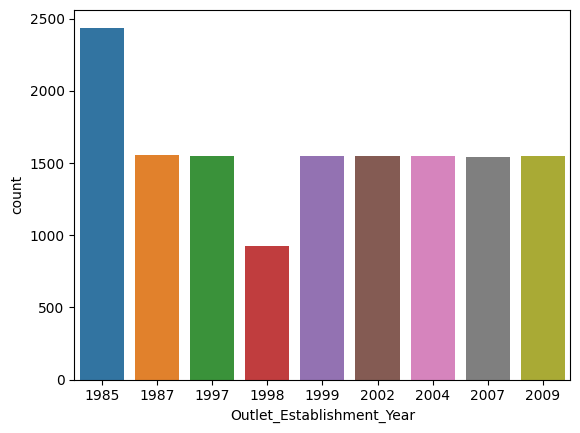

In [43]:
sns.countplot(x=df["Outlet_Establishment_Year"])

<AxesSubplot: xlabel='Outlet_Size', ylabel='count'>

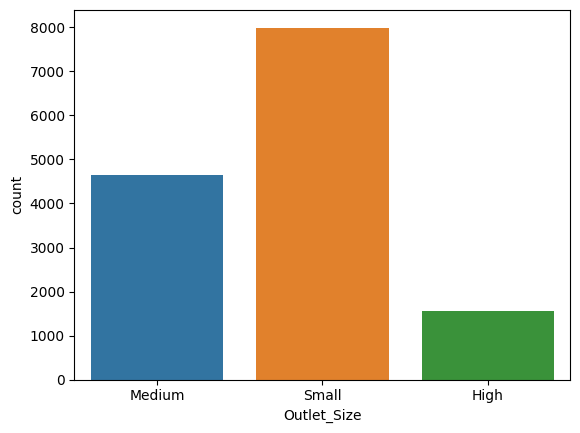

In [44]:
sns.countplot(x = df['Outlet_Size'])


<AxesSubplot: xlabel='Outlet_Type', ylabel='count'>

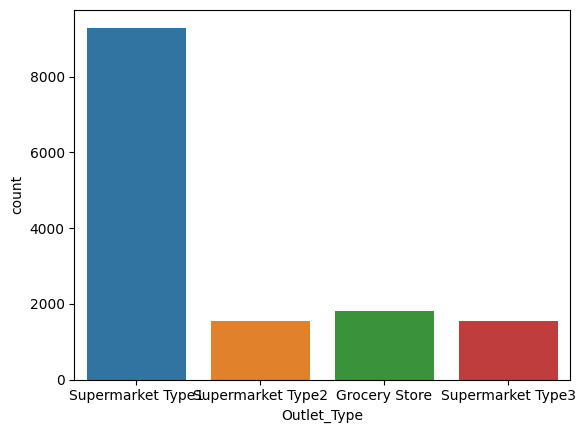

In [45]:
sns.countplot(x = df['Outlet_Type'])


<AxesSubplot: xlabel='Outlet_Location_Type', ylabel='count'>

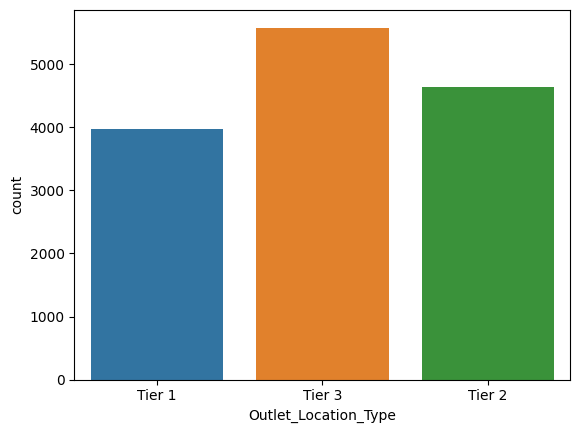

In [46]:
sns.countplot(x = df['Outlet_Location_Type'])


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
 13  New_Item_Type              14204 non-null  obje

In [48]:
encoder = LabelEncoder()


In [49]:
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])
df['New_Item_Type'] = encoder.fit_transform(df['New_Item_Type'])

In [50]:
df = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'New_Item_Type','Outlet_Identifier'])

In [51]:
df.dtypes

Item_Identifier                int32
Item_Weight                  float64
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
New_Item_Type_0                uint8
New_Item_Type_1                uint8
New_Item_Type_2                uint8
Outlet_Identifier_0            uint8
Outlet_Identifier_1            uint8
O

In [52]:
df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = df.loc[df['source']=="train"]
test = df.loc[df['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

C:\Users\pavan\AppData\Local\Temp\ipykernel_10772\1398681404.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
C:\Users\pavan\AppData\Local\Temp\ipykernel_10772\1398681404.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['source'],axis=1,inplace=True)


In [53]:
train = pd.read_csv("train_modified.csv")
test = pd.read_csv("test_modified.csv")

In [54]:
print (train.shape)
train.dtypes

(8523, 32)


Item_Identifier             int64
Item_Weight               float64
Item_Visibility           float64
Item_MRP                  float64
Item_Outlet_Sales         float64
Outlet_Years                int64
Item_Fat_Content_0          int64
Item_Fat_Content_1          int64
Item_Fat_Content_2          int64
Outlet_Location_Type_0      int64
Outlet_Location_Type_1      int64
Outlet_Location_Type_2      int64
Outlet_Size_0               int64
Outlet_Size_1               int64
Outlet_Size_2               int64
Outlet_Type_0               int64
Outlet_Type_1               int64
Outlet_Type_2               int64
Outlet_Type_3               int64
New_Item_Type_0             int64
New_Item_Type_1             int64
New_Item_Type_2             int64
Outlet_Identifier_0         int64
Outlet_Identifier_1         int64
Outlet_Identifier_2         int64
Outlet_Identifier_3         int64
Outlet_Identifier_4         int64
Outlet_Identifier_5         int64
Outlet_Identifier_6         int64
Outlet_Identif

In [55]:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn import metrics
def modelfit(alg, dtrain, dtest, predictors, target, IDcol):
    alg.fit(dtrain[predictors], dtrain[target])
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    r2_train = metrics.r2_score(dtrain[target], dtrain_predictions)
    print("R Square Value  :",r2_train)   
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    

In [56]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [57]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg1 = LinearRegression()
modelfit(alg1, train, test, predictors, target, IDcol)

R Square Value  : 0.7205206644669215


In [58]:
alg2 = Ridge()
modelfit(alg2, train, test, predictors, target, IDcol)

R Square Value  : 0.7205205606833663


In [59]:
alg3 = Lasso()
modelfit(alg3, train, test, predictors, target, IDcol)

R Square Value  : 0.2597339047834789


In [60]:
alg4 = DecisionTreeRegressor()
modelfit(alg4, train, test, predictors, target, IDcol)

R Square Value  : 1.0


In [61]:
alg5 = RandomForestRegressor()
modelfit(alg5, train, test, predictors, target, IDcol)

R Square Value  : 0.9589349161452694


In [62]:
alg6 = XGBRegressor()
modelfit(alg6, train, test, predictors, target, IDcol)

R Square Value  : 0.8634991269855565


In [63]:
# For Linear Regression R Square Value  : 0.7205206644669215
# For Ridge Regression R Square Value  : 0.7205205606833663
# For Lasso Regression R Square Value  : 0.2597339047834789
# For DecisionTreeRegression R Square Value  : 1.0
# For RandomForestRegression R Square Value  : 0.9590556642570791
# For XGBRegression R Square Value  : 0.8634991269855565